# Imports

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd


import matplotlib.pyplot as plt

from tqdm import tqdm

import keijzer_exogan as ke

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
sns.set()

# Load chunk
X[0] is a dict from regular chunk  
X[0][0] is a dict from .npy selection  

In [3]:
%%time
dir_ = '/datb/16011015/ExoGAN_data//'

X = np.load(dir_+'selection/last_chunks_25_percent.npy')

CPU times: user 43.1 s, sys: 9.37 s, total: 52.5 s
Wall time: 53.1 s


In [4]:
X = X.flatten()
#X = X[:5000]
print('Len X: ', len(X))
np.random.seed(23) # Set seed for the np.random functions

# Shuffle X along the first axis to make the order of simulations random
np.random.shuffle(X) # note that X = np.rand.... isn't required

Len X:  1250000


In [5]:
wavelengths = ke.load_wavelengths()

## Test ASPA run

100%|██████████| 32/32 [00:07<00:00,  2.66it/s]


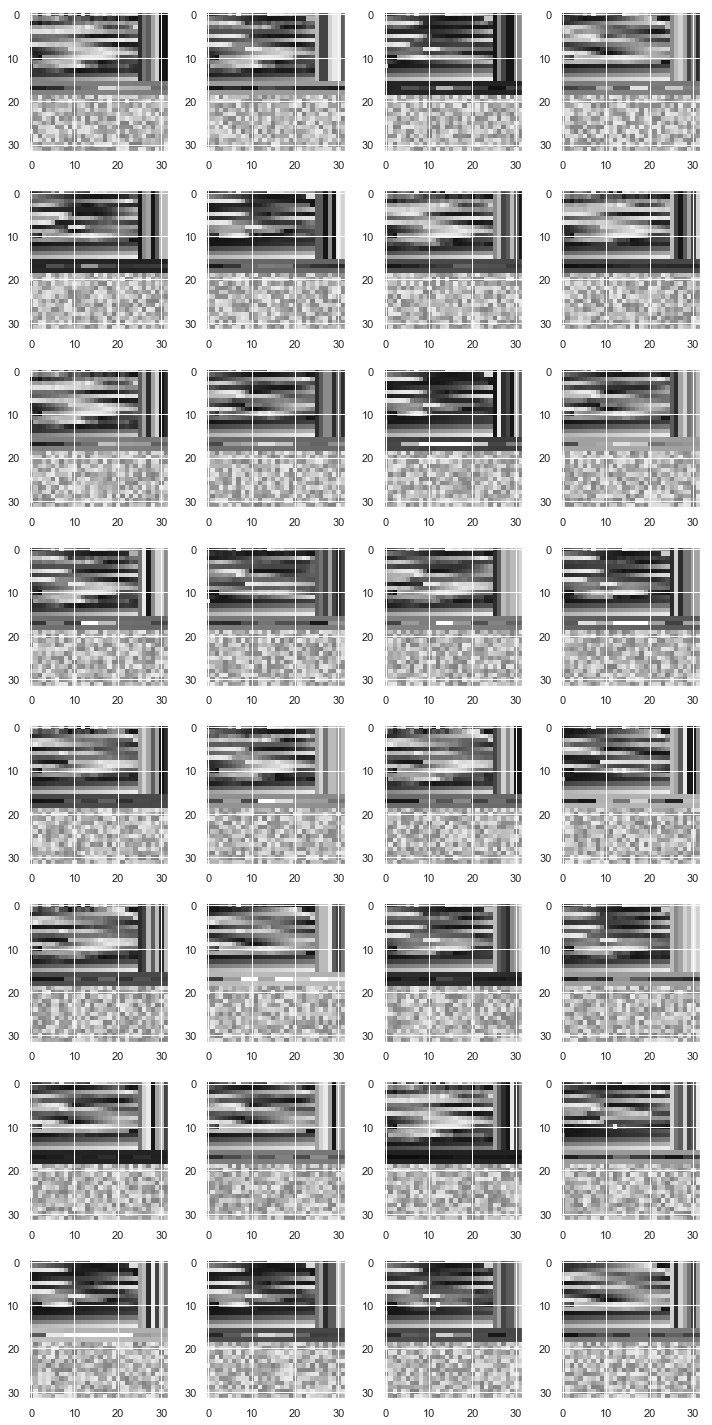

In [6]:
plt.figure(figsize=(10,20))

for i in tqdm(range(8*4)):
    image = ke.ASPA_v3(X[i], wavelengths)
    

    plt.subplot(8, 4, i+1)
    plt.imshow(image, cmap='gray', vmin=-1.2, vmax=1.2)
    plt.tight_layout()

# Creating images from all simulations in the chunk

In [7]:
from multiprocessing import Pool

In [8]:
data = [(X[i], wavelengths) for i in tqdm(range(len(X)))] # input to f must be a tuple

100%|██████████| 1250000/1250000 [00:02<00:00, 569052.21it/s]


In [9]:
def f(t):
    X_i , wavelengths = t
    image = ke.ASPA_v3(X_i, wavelengths)
    image = image.reshape(1,32,32)
    return image

In [10]:
%%time
pool = Pool(processes=24) # server has 2x 12 cores -> Pool(processes=24)
results = pool.map(f, data, chunksize=1)

CPU times: user 4min 36s, sys: 1min 11s, total: 5min 47s
Wall time: 13min 2s


In [ ]:
%%time
pool.close()
pool.join()
#pool.terminate() # not nice but meh, pool.join() gets stuck... https://stackoverflow.com/questions/15314189/python-multiprocessing-pool-hangs-at-join

In [12]:
pool.terminate()

In [13]:
len(results)

1250000

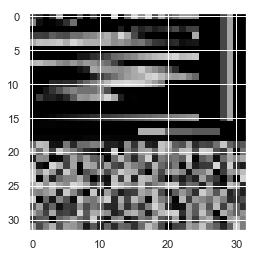

In [14]:
plt.imshow(results[0][0, :, :], cmap='gray', vmin=0, vmax=1.2)

In [15]:
%%time
images = np.array(results)

CPU times: user 3.07 s, sys: 9.43 s, total: 12.5 s
Wall time: 12.5 s


# Saving this array to disk

In [16]:
%%time
np.save(dir_+'selection/last_chunks_25_percent_images_v3.npy', images)

CPU times: user 1.41 s, sys: 7.58 s, total: 8.98 s
Wall time: 20.7 s


# Test loading and visualization

In [17]:
print('DONE')

DONE


In [ ]:
print("DONE")

In [ ]:
print("DONE")

In [ ]:
images = np.load(dir_+'selection/last_chunks_25_percent_images_v3.npy')

In [ ]:
images.shape

In [ ]:
plt.imshow(images[0,0,:,:], cmap='gray', vmin=0, vmax=1.2)

In [ ]:
plt.figure(figsize=(10,20))

for i in range(8*4):
    plt.subplot(8, 4, i+1)
    plt.imshow(images[i,0,:,:], cmap='gray', vmin=0, vmax=1.2)
    plt.tight_layout()